In [26697]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/incident_root_cause_data.csv")

df.head(100)

,avg_cpu_usage,memory_growth_rate,oom_log_count,request_rate,error_rate,latency,upstream_error_rate,dependency_latency,timeout_log_count,root_cause_label
0,89.690766,1.287685,2,581.742871,1.029533,248.002597,1.140284,372.577769,0,cpu_saturation
1,36.123522,0.172781,1,242.450321,0.511092,106.048987,0.241661,89.829339,2,normal
2,59.351527,0.292614,0,354.599613,0.373488,153.548558,0.343728,238.176104,2,normal
3,41.177794,0.149546,0,338.685021,0.341671,93.655335,0.123882,36.944770,3,normal
4,40.460313,0.206721,0,473.688807,3.009363,114.045909,0.366253,247.554513,16,bad_deployment
...,...,...,...,...,...,...,...,...,...,...
95,59.143862,1.112917,0,695.115208,0.538154,174.530319,0.547265,222.154578,2,traffic_spike
96,36.677941,0.109035,1,578.001309,0.430681,150.051900,5.111068,425.422520,8,external_dependency_failure
97,47.521598,1.073057,0,579.952135,0.453790,225.313432,0.204859,139.787156,0,memory_leak
98,35.213405,0.183309,0,225.686149,0.346033,76.827477,4.100615,323.563515,12,external_dependency_failure


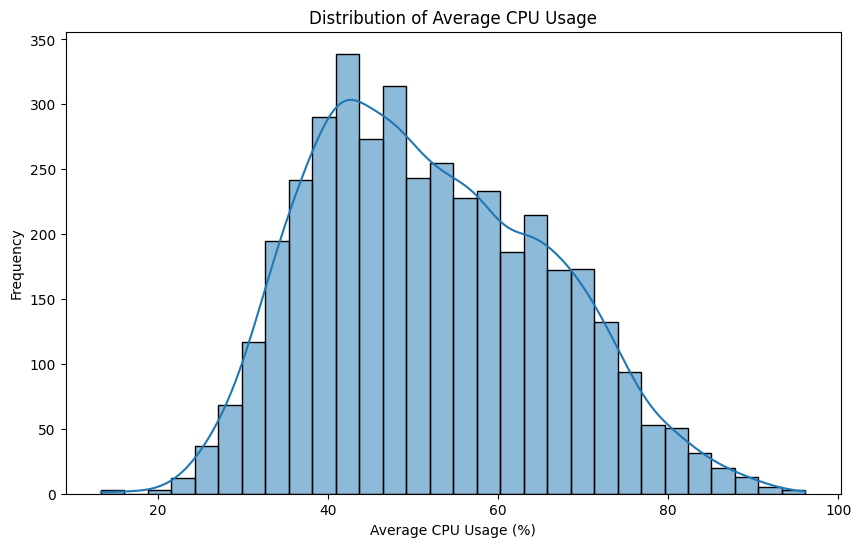

In [26698]:
# Distribution of CPU Usage
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_cpu_usage'], bins=30, kde=True)
plt.title('Distribution of Average CPU Usage')
plt.xlabel('Average CPU Usage (%)')
plt.ylabel('Frequency')
plt.show()

In [26699]:
# Distribution of Memory Usage
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_memory_usage'], bins=30, kde=True)
plt.title('Distribution of Average Memory Usage')
plt.xlabel('Average Memory Usage (%)')
plt.ylabel('Frequency')
plt.show()  

KeyError: 'avg_memory_usage'

<Figure size 1000x600 with 0 Axes>

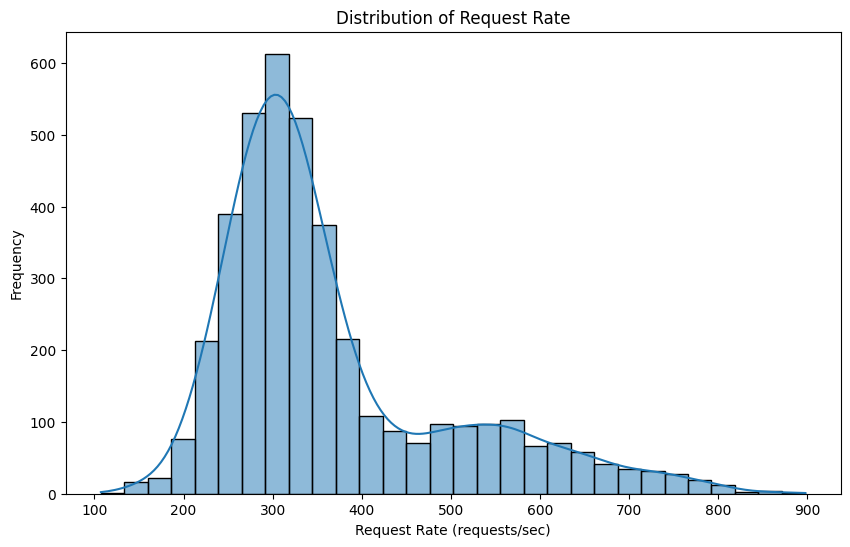

In [ ]:
# Distribution of Request Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['request_rate'], bins=30, kde=True)         
plt.title('Distribution of Request Rate')
plt.xlabel('Request Rate (requests/sec)')
plt.ylabel('Frequency')
plt.show()  

In [ ]:
df.groupby("root_cause_label")["avg_cpu_usage"].describe()[["mean", "std"]]

,mean,std
root_cause_label,,
bad_deployment,40.165096,9.662733
cpu_saturation,70.552520,12.599620
external_dependency_failure,40.304514,9.815977
memory_leak,40.127906,10.291725
normal,40.027542,10.017217
traffic_spike,57.981978,11.926988


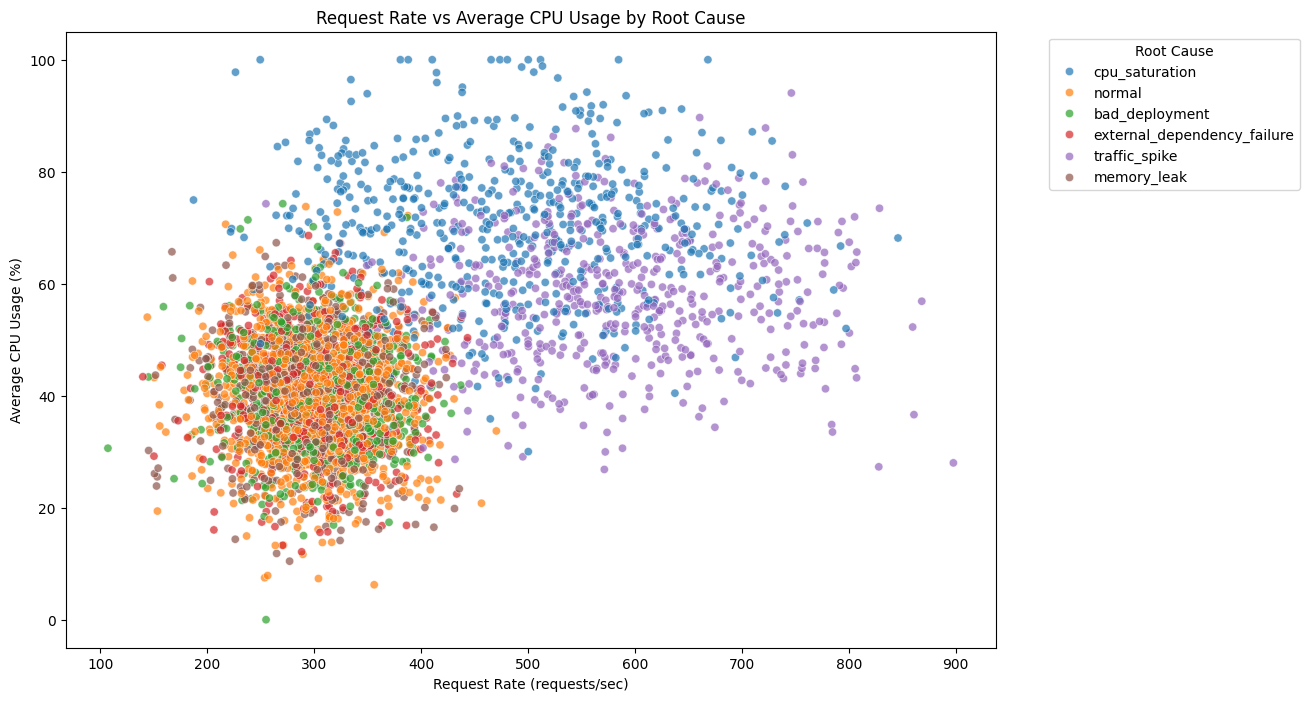

In [ ]:
# Request rate vs root cause vs avg cpu usage by Root Cause
plt.figure(figsize=(12, 8))
sns.scatterplot(x="request_rate", y="avg_cpu_usage", hue="root_cause_label", data=df, alpha=0.7)
plt.title("Request Rate vs Average CPU Usage by Root Cause")
plt.xlabel("Request Rate (requests/sec)")
plt.ylabel("Average CPU Usage (%)")
plt.legend(title="Root Cause", bbox_to_anchor=(1.05, 1), loc    ='upper left')
plt.show()

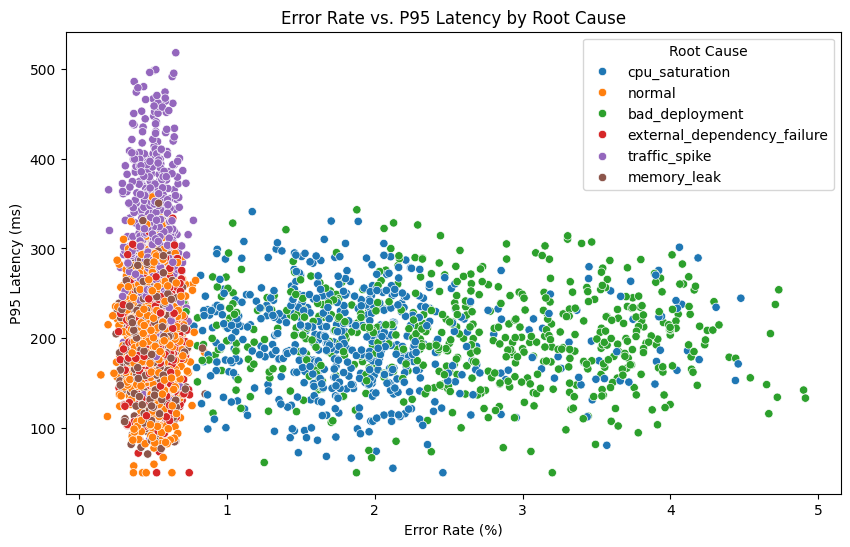

In [ ]:
# Error Rate vs. Latency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='error_rate', y='p95_latency', hue='root_cause_label', data=df)
plt.title('Error Rate vs. P95 Latency by Root Cause')
plt.xlabel('Error Rate (%)')
plt.ylabel('P95 Latency (ms)')
plt.legend(title='Root Cause')
plt.show()      

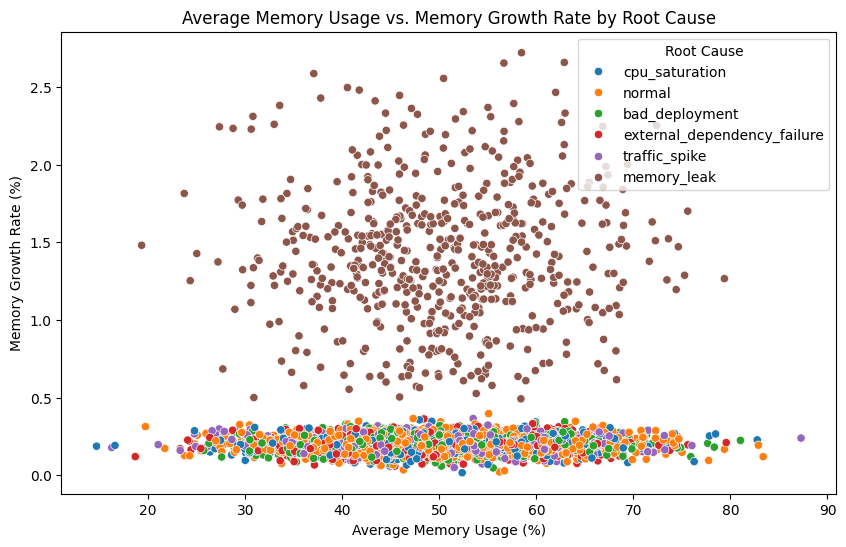

In [ ]:
# Memory usage vs. Memory Growth Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_memory_usage', y='memory_growth_rate', hue='root_cause_label', data=df)
plt.title('Average Memory Usage vs. Memory Growth Rate by Root Cause')
plt.xlabel('Average Memory Usage (%)')
plt.ylabel('Memory Growth Rate (%)')
plt.legend(title='Root Cause')
plt.show()

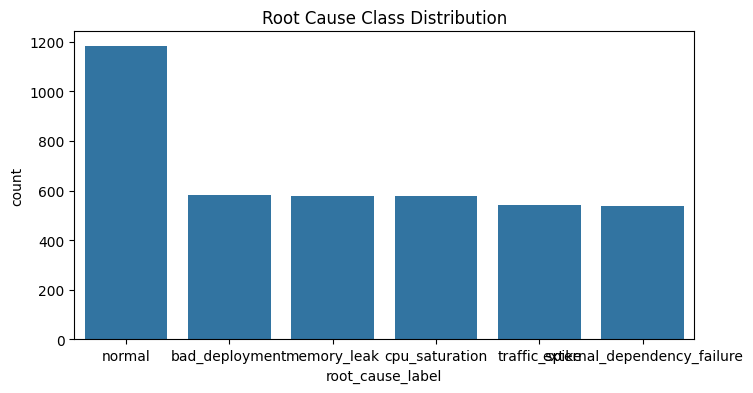

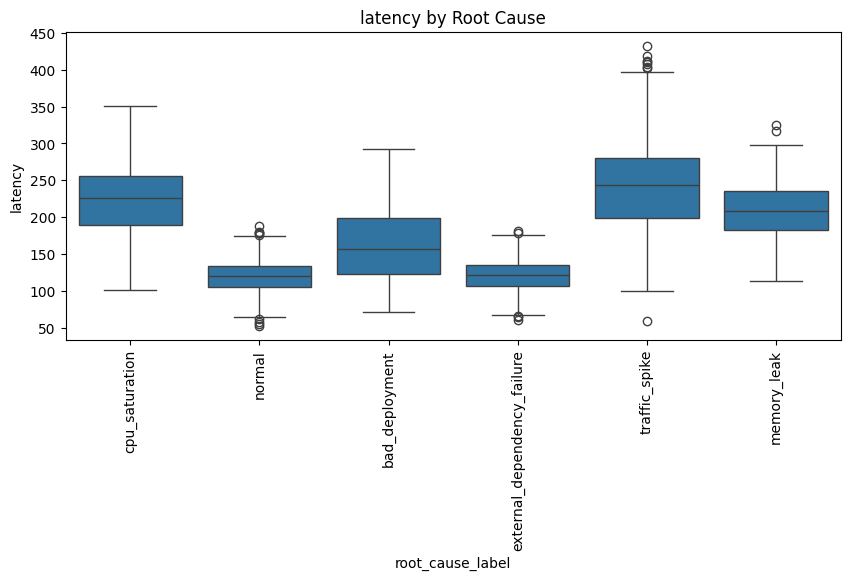

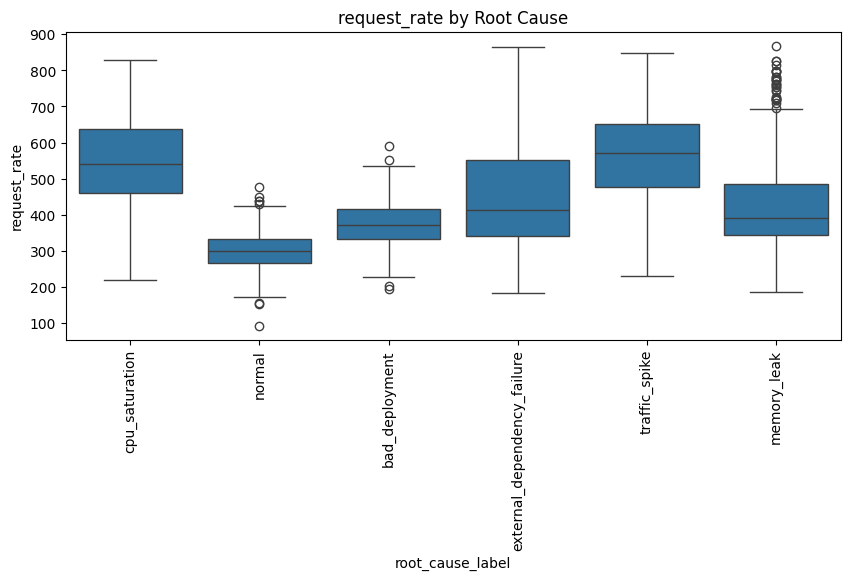

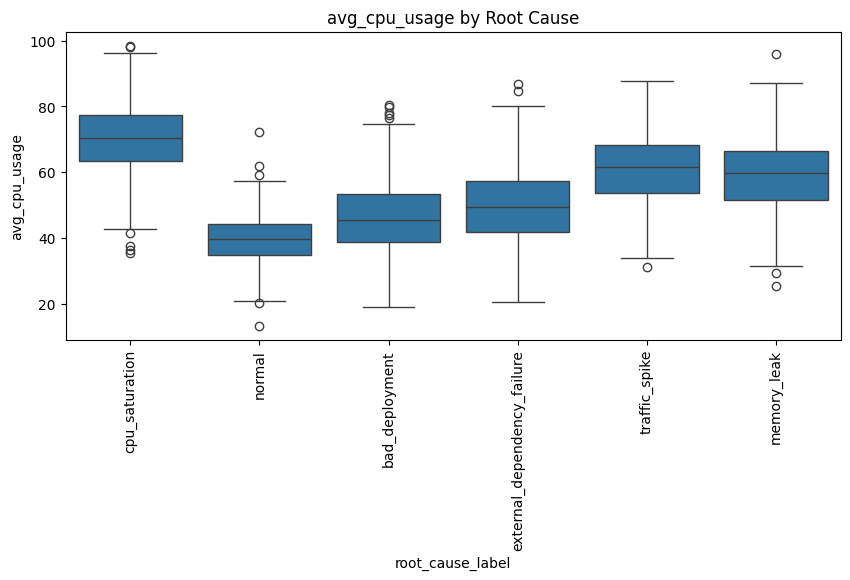

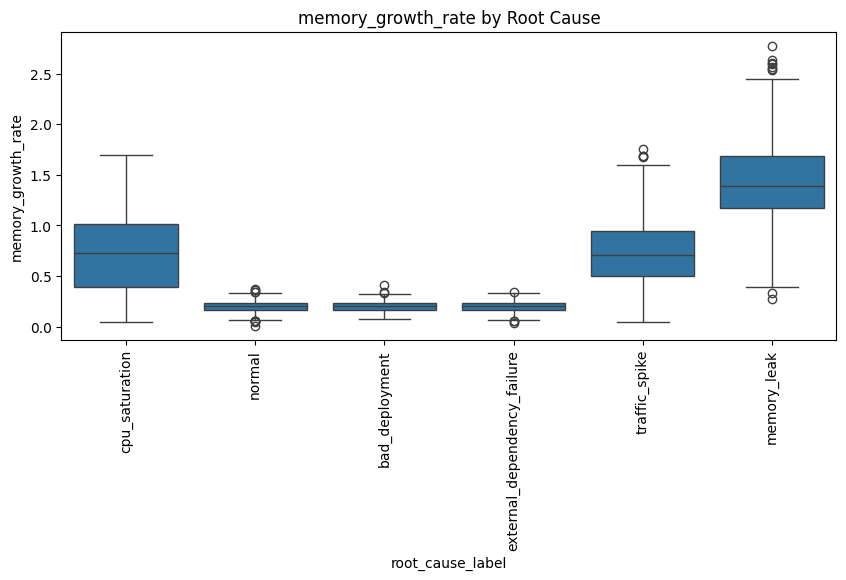

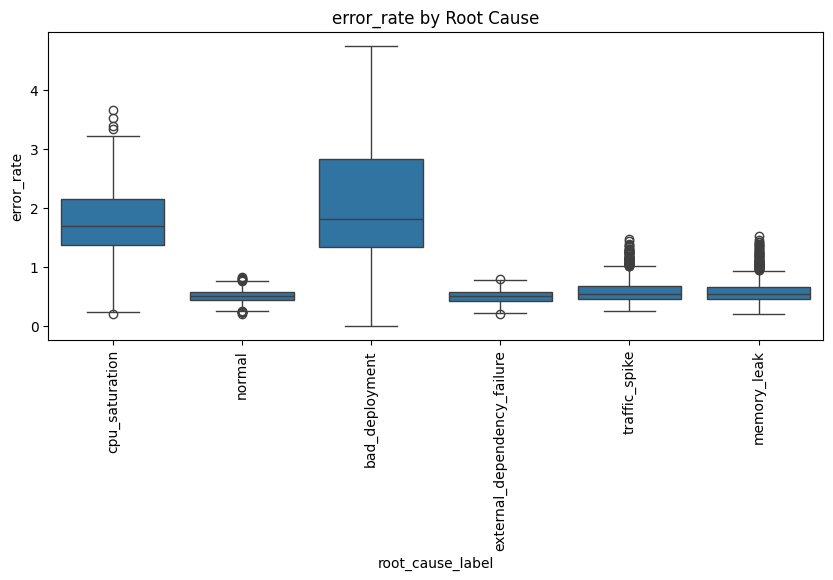

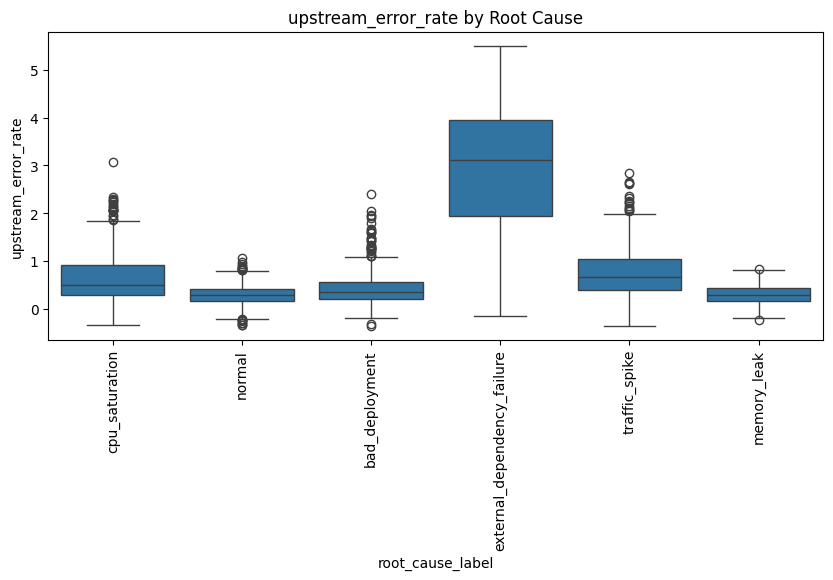

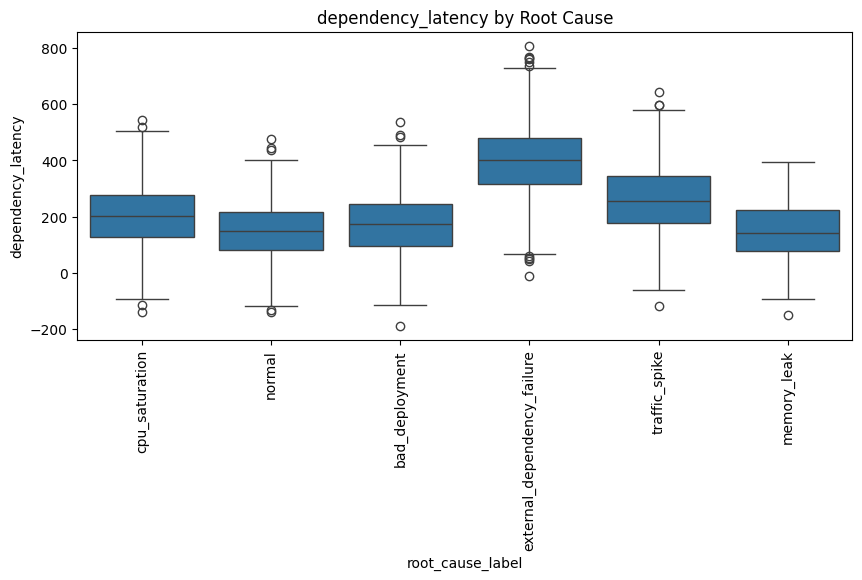

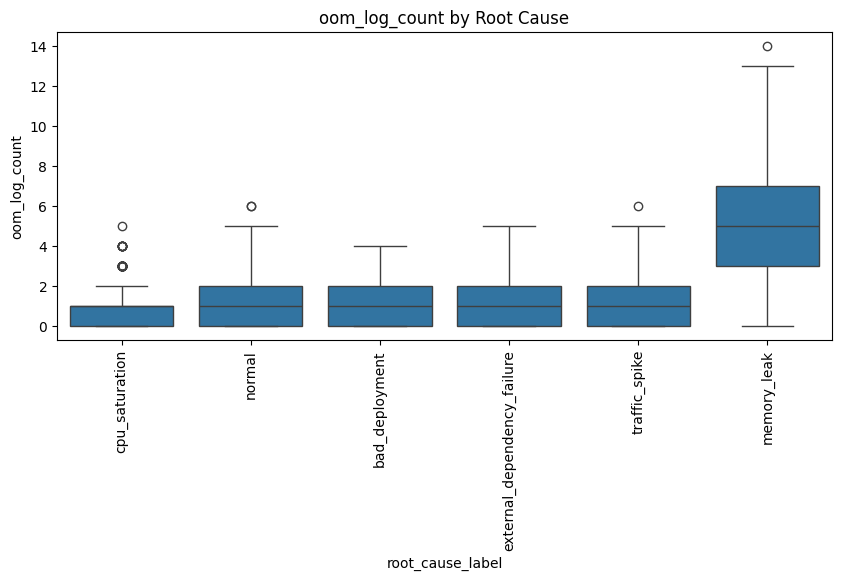

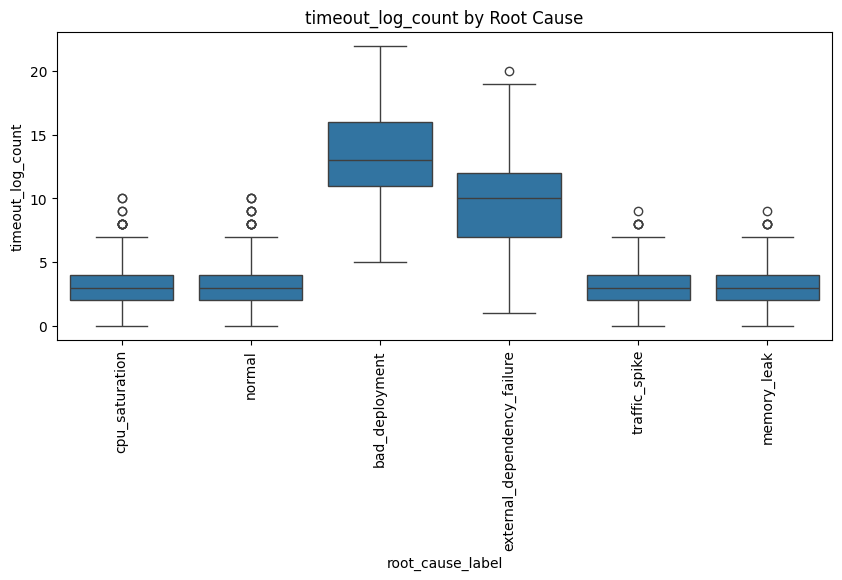

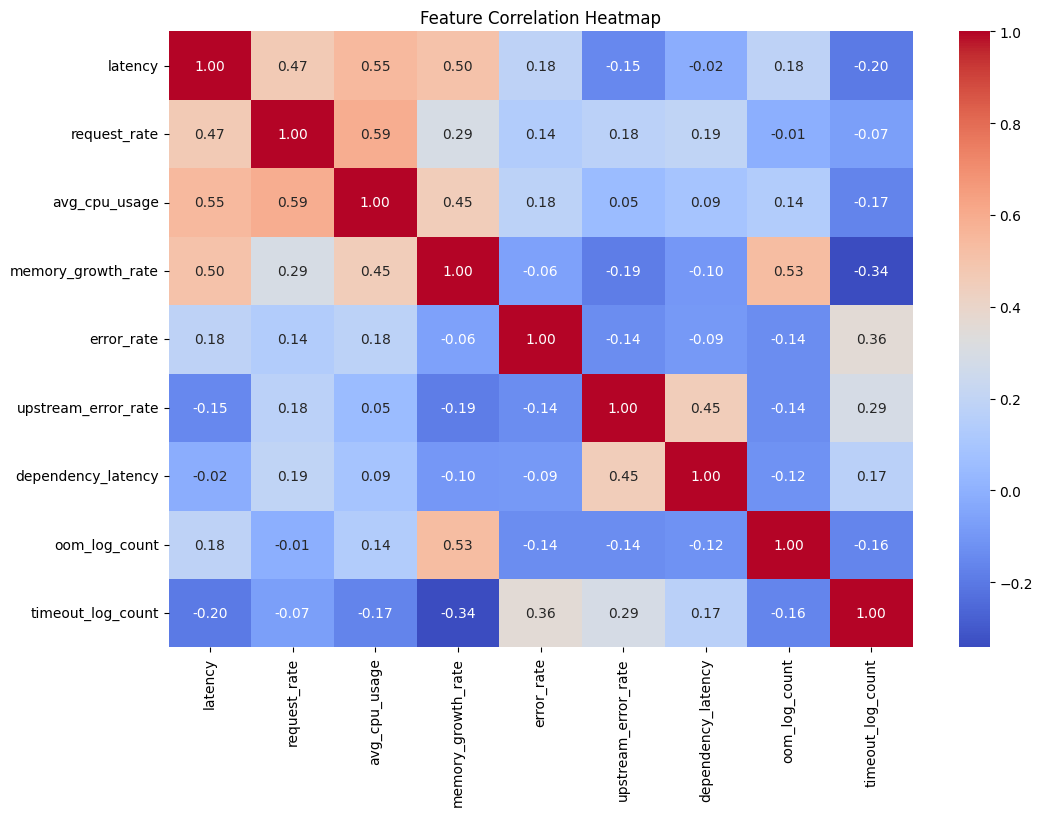

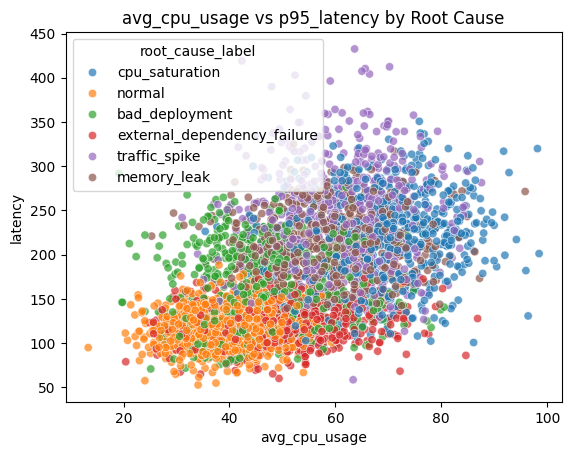

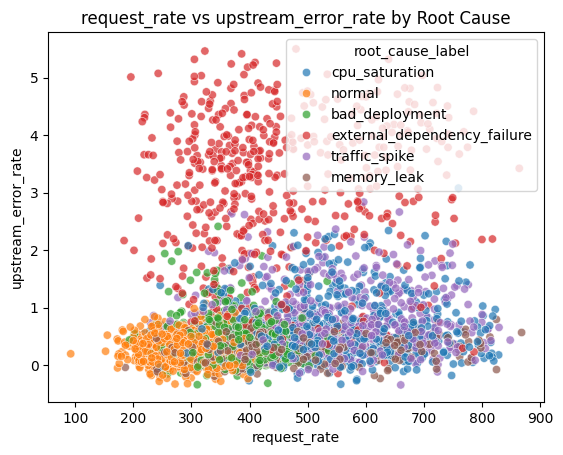

In [ ]:


# # Load your dataset
# df = pd.read_csv("../data/incident_root_cause_data.csv")

# 1️⃣ Check class distribution
plt.figure(figsize=(8,4))
sns.countplot(x='root_cause_label', data=df, order=df['root_cause_label'].value_counts().index)
plt.title("Root Cause Class Distribution")
plt.show()

# 2️⃣ Boxplots for numeric features to see overlap
numeric_features = [
    'latency','request_rate', 'avg_cpu_usage',
    'memory_growth_rate', 'error_rate',
    'upstream_error_rate', 'dependency_latency',
     'oom_log_count',
     'timeout_log_count'
]

for feature in numeric_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(x='root_cause_label', y=feature, data=df)
    plt.title(f"{feature} by Root Cause")
    plt.xticks(rotation=90)
    plt.show()
    

# 3️⃣ Pairwise correlation heatmap
plt.figure(figsize=(12,8))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 4️⃣ Scatter plots for key feature pairs to visualize overlaps
sns.scatterplot(x='avg_cpu_usage', y='latency', hue='root_cause_label', data=df, alpha=0.7)
plt.title("avg_cpu_usage vs p95_latency by Root Cause")
plt.show()

sns.scatterplot(x='request_rate', y='upstream_error_rate', hue='root_cause_label', data=df, alpha=0.7)
plt.title("request_rate vs upstream_error_rate by Root Cause")
plt.show()
